In [1]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
base_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

In [3]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [4]:
import os
from PIL import Image

os.makedirs("sample_data/class_a", exist_ok = True)
os.makedirs("sample_data/class_b", exist_ok = True)

for i in range (10):
    img = Image.fromarray(np.ones((224, 224, 3), dtype = np.uint8) * 255)
    img.save(f'sample_data/class_a/img_{i}.jpg')
    img = Image.fromarray(np.zeros((224, 224, 3), dtype = np.uint8) * 255)
    img.save(f'sample_data/class_b/img_{i}.jpg')

print("sample images created in sample_data/")

sample images created in sample_data/


In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size = (224, 224),
    batch_size = 35,
    class_mode = 'binary'
)
print(f'Found {train_generator.samples} images belonging to {train_generator.num_classes} classes.')

if train_generator.samples > 0:
    model.fit(train_generator, epochs = 10)


Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


C:\Users\sukri\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5000 - loss: 0.7160
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 5.1637
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.8498
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.8356
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.9204
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.9372
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.9178
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.8750
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.8197
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.7611


In [6]:
for layer in base_model.layers[-4:]:
    layer.trainable = True

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(train_generator, epochs = 10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 0.7116
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.5604
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 3.0559
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 1.7642
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6911
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6817
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6688
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6336
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6905
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.5460


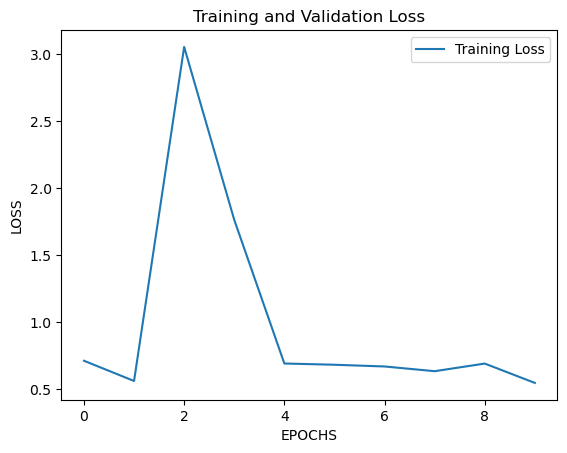

In [7]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['loss'], label = 'Training Loss')
# plt.plot(model.history.history['val_loss'], label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()
plt.show()

Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.5997 - val_accuracy: 0.5000 - val_loss: 0.7784
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7784 - val_accuracy: 1.0000 - val_loss: 0.3615
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.3615 - val_accuracy: 0.5000 - val_loss: 0.6793
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6793 - val_accuracy: 1.0000 - val_loss: 0.2415
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.2415 - val_accuracy: 0.5000 - val_loss: 0.4351
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.4351 - val_accuracy: 1.0000 - val_loss: 0.1473
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.1473 - val_accuracy: 1.0000 - val_loss: 0.2007
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1

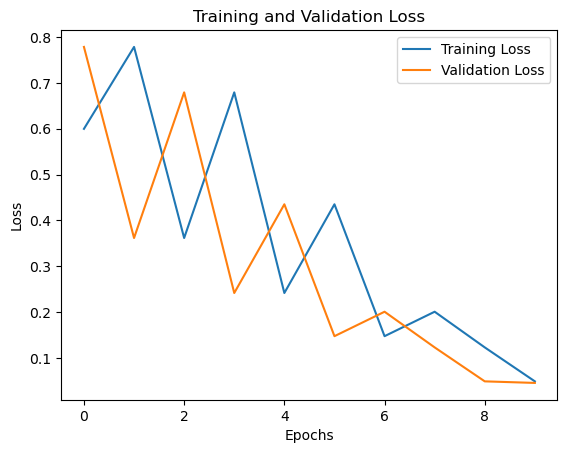

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Train the model with validation data
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.0453 - val_accuracy: 1.0000 - val_loss: 0.0222
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0222 - val_accuracy: 1.0000 - val_loss: 0.0162
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0162 - val_accuracy: 1.0000 - val_loss: 0.0129
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0129 - val_accuracy: 1.0000 - val_loss: 0.0109
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0109 - val_accuracy: 1.0000 - val_loss: 0.0094
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0094 - val_accuracy: 1.0000 - val_loss: 0.0084
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0084 - val_accuracy: 1.0000 - val_loss: 0.0075
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 1.0000 - val_loss: 0.0068
Epoch 9/10
1/1 ━

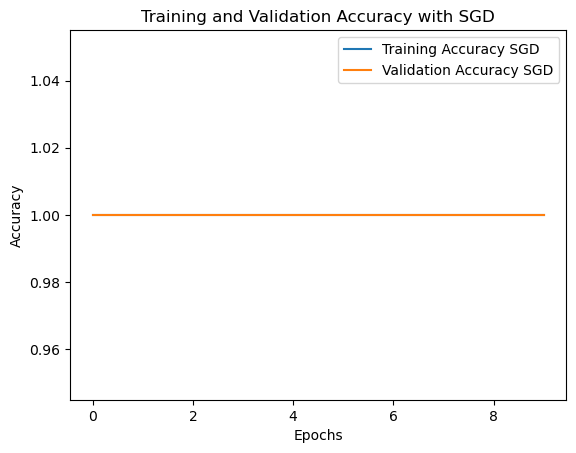

In [10]:
from tensorflow.keras.models import clone_model
import matplotlib.pyplot as plt

def reset_model(model):
    model_clone = clone_model(model)
    model_clone.set_weights(model.get_weights())
    return model_clone

initial_model = reset_model(model)  

sgd_model = reset_model(initial_model)  
sgd_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history_sgd = sgd_model.fit(train_generator, epochs=10, validation_data=validation_generator)


plt.plot(history_sgd.history['accuracy'], label='Training Accuracy SGD')
plt.plot(history_sgd.history['val_accuracy'], label='Validation Accuracy SGD')
plt.title('Training and Validation Accuracy with SGD')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 1.0000 - loss: 0.0453 - val_accuracy: 0.5000 - val_loss: 8.7445
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 8.7445 - val_accuracy: 0.5000 - val_loss: 0.8745
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.8745 - val_accuracy: 0.5000 - val_loss: 0.6726
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6726 - val_accuracy: 0.5000 - val_loss: 0.6640
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6640 - val_accuracy: 0.5000 - val_loss: 0.4436
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.4436 - val_accuracy: 0.5000 - val_loss: 1.2222
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 1.2222 - val_accuracy: 0.5000 - val_loss: 0.7093
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7093 - val_accuracy: 0.5000 - val_loss: 0.7241
Epoch 9/10
1/1 ━

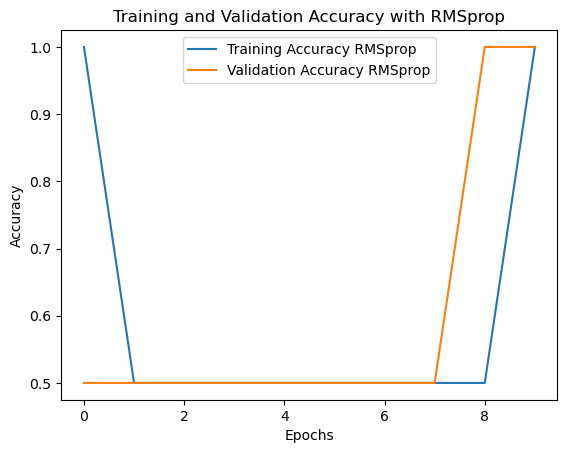

In [11]:

rmsprop_model = reset_model(initial_model)  # Reset model
rmsprop_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_rmsprop = rmsprop_model.fit(train_generator, epochs=10, validation_data=validation_generator)

plt.plot(history_rmsprop.history['accuracy'], label='Training Accuracy RMSprop')
plt.plot(history_rmsprop.history['val_accuracy'], label='Validation Accuracy RMSprop')
plt.title('Training and Validation Accuracy with RMSprop')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

Found 20 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0453
Test Accuracy: 100.00%
Test Loss: 0.0453


Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.0000e+00 - loss: 0.7082
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 1.1417
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 2.7448
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 2.2711
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.5543
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.4004
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.8556
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.8385
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.5436
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.2549
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 1.0000 - loss: 0.1971
Epoch 2/10
1/1 ━━━━━━━━━

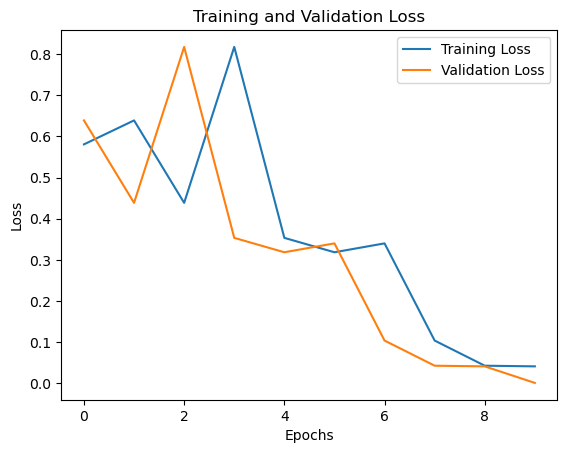

In [13]:
base_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

train_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size = (224, 224),
    batch_size = 35,
    class_mode = 'binary'
)
print(f'Found {train_generator.samples} images belonging to {train_generator.num_classes} classes.')

if train_generator.samples > 0:
    model.fit(train_generator, epochs = 10)

for layer in base_model.layers[-4:]:
    layer.trainable = True

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(train_generator, epochs = 10)

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Train the model with validation data
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

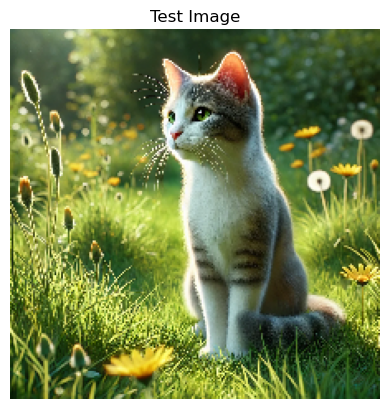

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
Prediction: Class 1 (Positive)
[[0.9965407]]


In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

image_path = "cat.jpg"  
img = load_img(image_path, target_size=(224, 224))  
img_array = img_to_array(img) / 255.0  
img_array = np.expand_dims(img_array, axis=0)  

plt.imshow(img)
plt.title("Test Image")
plt.axis("off")
plt.show()

# Predict using the model
predictions = model.predict(img_array)

# Interpret the result
if predictions[0][0] > 0.5:
    print("Prediction: Class 1 (Positive)")
else:
    print("Prediction: Class 0 (Negative)")

print(predictions)

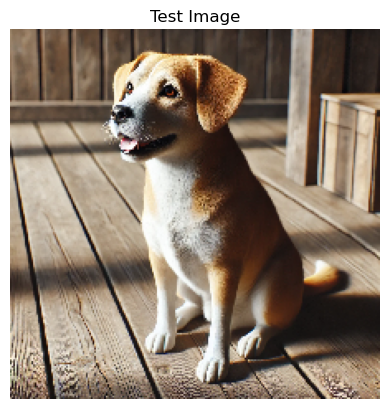

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
Prediction: Class 0 (Negative)
[[0.09560873]]


In [16]:
image_path = "dog.jpg"  
img = load_img(image_path, target_size=(224, 224))  
img_array = img_to_array(img) / 255.0  
img_array = np.expand_dims(img_array, axis=0)  

plt.imshow(img)
plt.title("Test Image")
plt.axis("off")
plt.show()

# Predict using the model
predictions = model.predict(img_array)

# Interpret the result
if predictions[0][0] > 0.5:
    print("Prediction: Class 1 (Positive)")
else:
    print("Prediction: Class 0 (Negative)")

print(predictions)

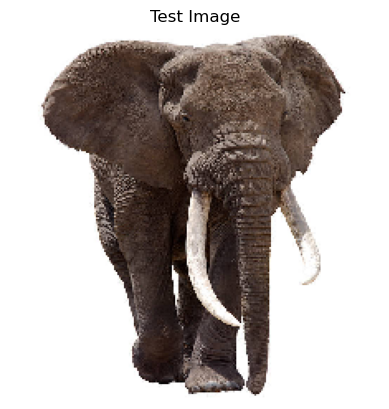

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Prediction: Class 0 (Negative)
[[1.0776446e-07]]


In [17]:
image_path = "elephant.jpg"  
img = load_img(image_path, target_size=(224, 224))  
img_array = img_to_array(img) / 255.0  
img_array = np.expand_dims(img_array, axis=0)  

plt.imshow(img)
plt.title("Test Image")
plt.axis("off")
plt.show()

# Predict using the model
predictions = model.predict(img_array)

# Interpret the result
if predictions[0][0] > 0.5:
    print("Prediction: Class 1 (Positive)")
else:
    print("Prediction: Class 0 (Negative)")

print(predictions)

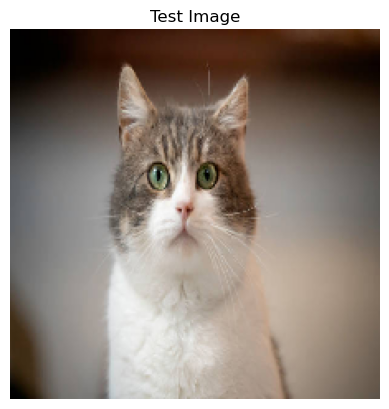

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
Prediction: Class 0 (Negative)
[[0.00895582]]


In [19]:
image_path = 'cat2.jpg'
img = load_img(image_path, target_size = (224, 224))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis = 0)

plt.imshow(img)
plt.title("Test Image")
plt.axis("off")
plt.show()

# Predict using the model
predictions = model.predict(img_array)

# Interpret the result
if predictions[0][0] > 0.5:
    print("Prediction: Class 1 (Positive)")
else:
    print("Prediction: Class 0 (Negative)")

print(predictions)